In [1]:
! pip install wordclouds
! pip install nltk
! pip install seaborn
! pip install vaderSentiment
! pip install xlrd
! pip install python-dateutil
! pip install langdetect

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import pandas as pd
from datetime import datetime
import re

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import itertools
import collections
import string
import dateutil

import networkx as nx
import os
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ERROR: Could not find a version that satisfies the requirement wordclouds
ERROR: No matching distribution found for wordclouds


In [2]:
df1 = pd.read_csv('SteveJobs_tweets_01.10_all.csv')
df2 = pd.read_csv('SteveJobs_tweets_02.10_all.csv')
df3 = pd.read_csv('SteveJobs_tweets_03.10_all.csv')
df4 = pd.read_csv('SteveJobs_tweets_04.10_all.csv')
df5 = pd.read_csv('SteveJobs_tweets_05.10_all.csv',lineterminator='\n')
df6 = pd.read_csv('SteveJobs_tweets_06.10_all_100k.csv')
df7 = pd.read_csv('SteveJobs_tweets_07.10_all.csv')
df8 = pd.read_csv('SteveJobs_tweets_08.10_all.csv')
df9 = pd.read_csv('SteveJobs_tweets_09.10_all.csv')
df10 = pd.read_csv('SteveJobs_tweets_10.10_all.csv')
df11 = pd.read_csv('SteveJobs_tweets_11.10_all.csv')
df12 = pd.read_csv('SteveJobs_tweets_12.10_all.csv')
df13 = pd.read_csv('SteveJobs_tweets_13.10_all.csv')
df14 = pd.read_csv('SteveJobs_tweets_14.10_all.csv')
df15 = pd.read_csv('SteveJobs_tweets_15.10_all.csv')
df16 = pd.read_csv('SteveJobs_tweets_16.10_all.csv')
df17 = pd.read_csv('SteveJobs_tweets_17.10_all.csv')
df18 = pd.read_csv('SteveJobs_tweets_18.10_all.csv')
df19 = pd.read_csv('SteveJobs_tweets_19.10_all.csv')
df20 = pd.read_csv('SteveJobs_tweets_20.10_all.csv')
df21 = pd.read_csv('SteveJobs_tweets_21.10_all.csv')
df22 = pd.read_csv('SteveJobs_tweets_22.10_all.csv')
df23 = pd.read_csv('SteveJobs_tweets_23.10_all.csv')
df24 = pd.read_csv('SteveJobs_tweets_24.10_all.csv')
df25 = pd.read_csv('SteveJobs_tweets_25.10_all.csv')
df26 = pd.read_csv('SteveJobs_tweets_26.10_all.csv')
df27 = pd.read_csv('SteveJobs_tweets_27.10_all.csv')
df28 = pd.read_csv('SteveJobs_tweets_28.10_all.csv')
df29 = pd.read_csv('SteveJobs_tweets_29.10_all.csv')
df30 = pd.read_csv('SteveJobs_tweets_30.10_all.csv')
df31 = pd.read_csv('SteveJobs_tweets_31.10_all.csv')
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31])


df['Tweet'] = df['Tweet'].str.replace('\W', ' ', regex=True)

df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'], format="%Y-%m-%d %H:%M:%S")
df['Date_time'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

df['Tweet'] = df['Tweet'].apply(str)
df['day'] = pd.DatetimeIndex(df['Date']).day
df['month'] = pd.DatetimeIndex(df['Date']).month

df = df.drop(df.columns[[0, 3]],axis = 1)
df.head(10)

,Date,Tweet,Date_time,day,month
0,2011-10-01,Steve Jobs,2011-10-01 23:59:21+00:00,1.0,10.0
1,2011-10-01,NEW Apple iPad 2011 Part 2 Steve Jobs ...,2011-10-01 23:59:08+00:00,1.0,10.0
2,2011-10-01,revistasuper Como Steve Jobs matou os nerd...,2011-10-01 23:58:38+00:00,1.0,10.0
3,2011-10-01,as ações da apple aumentaram do mês passado pr...,2011-10-01 23:56:48+00:00,1.0,10.0
4,2011-10-01,RT revistasuper Como Steve Jobs matou os ner...,2011-10-01 23:56:23+00:00,1.0,10.0
5,2011-10-01,MY HERO revistasuper Como Steve Jobs matou...,2011-10-01 23:55:23+00:00,1.0,10.0
6,2011-10-01,Apple s Steve Jobs One of a kind San Jose M...,2011-10-01 23:53:02+00:00,1.0,10.0
7,2011-10-01,Esse eh fera revistasuper Como Steve Jobs ...,2011-10-01 23:50:49+00:00,1.0,10.0
8,2011-10-01,Steve Jobs initiated contact with Samsung to...,2011-10-01 23:50:40+00:00,1.0,10.0
9,2011-10-01,Aprendiz de Steve Jobs menino de 13 anos dese...,2011-10-01 23:50:30+00:00,1.0,10.0


In [3]:

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [5]:
# Removing stop words
stop_words = stopwords.words("english")

df['Tweets_clean'] = df['Tweet'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
df['Tweets_clean'] = df['Tweets_clean'].str.replace('\d+', '')

df['Tweets_clean'] = df['Tweets_clean'].apply(str)
df["Tweets_clean"]

<ipython-input-5-602d6d6447bb>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweets_clean'] = df['Tweets_clean'].str.replace('\d+', '')


0                                               Steve Jobs
1        NEW Apple iPad  Part  Steve Jobs Keynote http ...
2        revistasuper Como Steve Jobs matou os nerds ht...
3        ações da apple aumentaram mês passado pra cá m...
4        RT revistasuper Como Steve Jobs matou os nerds...
                               ...                        
38915    So moved Steve Jobs sister eulogy take time re...
38916    Gave chills AndreaC How people obsessing Jobs ...
38917    Sister recalls Steve Jobs last words Oh Wow bi...
38918    As sad turtleneck legacy part funny Sister Ste...
38919    A Sister Eulogy Steve Jobs http co BOezSUtE vi...
Name: Tweets_clean, Length: 1621922, dtype: object

In [6]:
# TOKENIZATION
tt = TweetTokenizer()
df['Tweets_clean'] = df['Tweets_clean'].apply(str)
df["Tweets_clean"] = df["Tweets_clean"].apply(tt.tokenize)

lmtzr = WordNetLemmatizer()

df["Tweets_clean"] = df["Tweets_clean"].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])
df["Tweets_clean"]

0                                            [Steve, Jobs]
1        [NEW, Apple, iPad, Part, Steve, Jobs, Keynote,...
2        [revistasuper, Como, Steve, Jobs, matou, o, ne...
3        [ações, da, apple, aumentaram, mês, passado, p...
4        [RT, revistasuper, Como, Steve, Jobs, matou, o...
                               ...                        
38915    [So, moved, Steve, Jobs, sister, eulogy, take,...
38916    [Gave, chill, AndreaC, How, people, obsessing,...
38917    [Sister, recall, Steve, Jobs, last, word, Oh, ...
38918    [As, sad, turtleneck, legacy, part, funny, Sis...
38919    [A, Sister, Eulogy, Steve, Jobs, http, co, BOe...
Name: Tweets_clean, Length: 1621922, dtype: object

In [20]:
import langdetect 

df["Tweets_clean"] = [word for word in df['Tweets_clean'] if detect_language(word) == 'English']
df["Tweets_clean"]

NameError: name 'detect_language' is not defined

In [2]:
df['Tweets_clean'] = df['Tweets_clean'].apply(str)

def remove_url(txt):
    return " ".join(str.extract('(.*)http?.*.com?(.*)?').split())

df_no_urls = [remove_url(text) for text in df['Tweets_clean']]

df_no_urls[:1]

df1['post_title'] = df1['post_title'].str.extract('(.*)http?.*.com?(.*)?').sum(1)

lower_case = [word.lower() for word in df['Tweets_clean']]
sentences = df['Tweets_clean']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

NameError: name 'df' is not defined

In [14]:
# List of all words
all_words_no_urls = list(itertools.chain(*words_in_df))

#counts_no_urls.most_common(15)
all_words_no_urls

["['steve',",
 "'jobs']",
 "['new',",
 "'apple',",
 "'ipad',",
 "'part',",
 "'steve',",
 "'jobs',",
 "'keynote',",
 "'http',",
 "'co',",
 "'rnjzdow']",
 "['revistasuper',",
 "'como',",
 "'steve',",
 "'jobs',",
 "'matou',",
 "'o',",
 "'nerd',",
 "'http',",
 "'co',",
 "'wvlayfkl',",
 "'esse',",
 "'steve',",
 "'jobs',",
 "'e',",
 "'foda']",
 "['ações',",
 "'da',",
 "'apple',",
 "'aumentaram',",
 "'mês',",
 "'passado',",
 "'pra',",
 "'cá',",
 "'mesmo',",
 "'sem',",
 "'steve',",
 "'job',",
 "'hm']",
 "['rt',",
 "'revistasuper',",
 "'como',",
 "'steve',",
 "'jobs',",
 "'matou',",
 "'o',",
 "'nerd',",
 "'http',",
 "'co',",
 "'spipad']",
 "['my',",
 "'hero',",
 "'revistasuper',",
 "'como',",
 "'steve',",
 "'jobs',",
 "'matou',",
 "'o',",
 "'nerd',",
 "'http',",
 "'co',",
 "'qwdvl']",
 "['apple',",
 "'steve',",
 "'jobs',",
 "'one',",
 "'kind',",
 "'san',",
 "'jose',",
 "'mercury',",
 "'news',",
 "'http',",
 "'co',",
 "'wymqss',",
 "'steve',",
 "'job',",
 "'apple']",
 "['esse',",
 "'eh',",
 "'fe

In [15]:
stop_words = stopwords.words('english')
# Remove stop words from each list of words
df_nsw = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]

df_nsw

[["['steve',", "'jobs']"],
 ["['new',",
  "'apple',",
  "'ipad',",
  "'part',",
  "'steve',",
  "'jobs',",
  "'keynote',",
  "'http',",
  "'co',",
  "'rnjzdow']"],
 ["['revistasuper',",
  "'como',",
  "'steve',",
  "'jobs',",
  "'matou',",
  "'o',",
  "'nerd',",
  "'http',",
  "'co',",
  "'wvlayfkl',",
  "'esse',",
  "'steve',",
  "'jobs',",
  "'e',",
  "'foda']"],
 ["['ações',",
  "'da',",
  "'apple',",
  "'aumentaram',",
  "'mês',",
  "'passado',",
  "'pra',",
  "'cá',",
  "'mesmo',",
  "'sem',",
  "'steve',",
  "'job',",
  "'hm']"],
 ["['rt',",
  "'revistasuper',",
  "'como',",
  "'steve',",
  "'jobs',",
  "'matou',",
  "'o',",
  "'nerd',",
  "'http',",
  "'co',",
  "'spipad']"],
 ["['my',",
  "'hero',",
  "'revistasuper',",
  "'como',",
  "'steve',",
  "'jobs',",
  "'matou',",
  "'o',",
  "'nerd',",
  "'http',",
  "'co',",
  "'qwdvl']"],
 ["['apple',",
  "'steve',",
  "'jobs',",
  "'one',",
  "'kind',",
  "'san',",
  "'jose',",
  "'mercury',",
  "'news',",
  "'http',",
  "'co',",
 

In [70]:
# Flatten list of words
all_words_nsw_nc = list(itertools.chain(*df_nsw))

# Create counter of words
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('jobs', 1611255),
 ('steve', 1600621),
 ('http', 1011811),
 ('co', 1006973),
 ('de', 302893),
 ('apple', 263490),
 ('rt', 193675),
 ('la', 131886),
 ('stevejobs', 129082),
 ('que', 113640),
 ('el', 98687),
 ('via', 96671),
 ('iphone', 84872),
 ('en', 71514),
 ('hope', 65516)]

In [51]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw

,words,count
0,jobs,1611255
1,steve,1600621
2,http,1011811
3,co,1006973
4,de,302893
...,...,...
95,stay,15910
96,stanford,15710
97,em,15572
98,si,15338


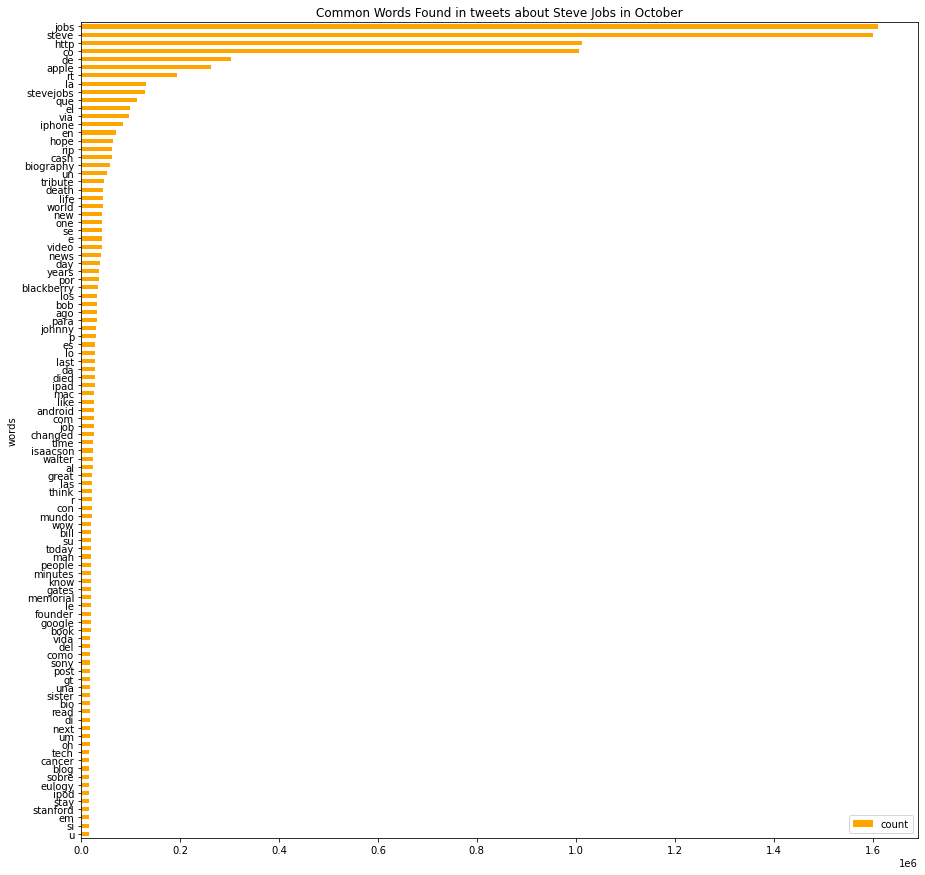

In [53]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in tweets about Steve Jobs in October")

plt.show()

In [54]:
text = clean_df_ncw.iloc[:, 0]
text

0         jobs
1        steve
2         http
3           co
4           de
        ...   
95        stay
96    stanford
97          em
98          si
99           u
Name: words, Length: 100, dtype: object

<Figure size 432x288 with 0 Axes>

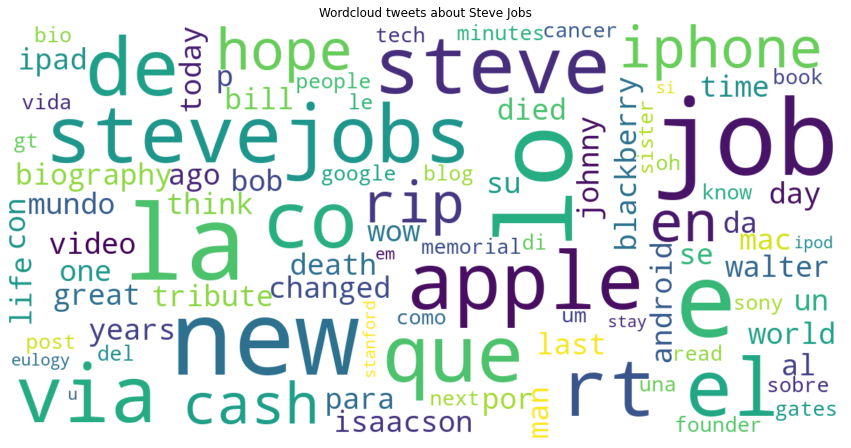

In [55]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
title="Wordcloud tweets about Steve Jobs"
plt.title(title)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")

In [56]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

In [58]:
df_results = pd.DataFrame(sentimentScore(df['clean_text']))
df=pd.merge(df, df_results, left_index=True, right_index=True)
df.set_index('Date_time', inplace=True)
df

,Date,Tweet,clean_text,neg,neu,pos,compound
Date_time,,,,,,,
2011-10-01 23:59:21+00:00,2011-10-01,Steve Jobs,Steve Jobs,0.000,1.000,0.0,0.0000
2011-10-02 23:59:49+00:00,2011-10-02,Jeff Bezos est il le nouveau Steve Jobs http...,Jeff Bezos est il le nouveau Steve Jobs http c...,0.000,1.000,0.0,0.0000
2011-10-03 23:59:32+00:00,2011-10-03,setiap baca artikel bisnis selalu kagum dg Ste...,setiap baca artikel bisnis selalu kagum dg Ste...,0.000,1.000,0.0,0.0000
2011-10-04 23:59:46+00:00,2011-10-04,jasmintruong I miss Steve Jobs But you got...,jasmintruong I miss Steve Jobs But gotta give ...,0.000,1.000,0.0,0.0000
2011-10-05 23:59:59+00:00,2011-10-05,RIP steve jobs thank you for the best phone ...,RIP steve jobs thank best phone world iloveapple,0.000,1.000,0.0,0.0000
...,...,...,...,...,...,...,...
2011-10-07 00:00:00+00:00,2011-10-07,steve jobs rip you have changed the world for...,steve jobs rip changed world forever thank,0.000,1.000,0.0,0.0000
2011-10-07 00:00:00+00:00,2011-10-07,3 Apples that changed the world the one that ...,Apples changed world one Eve ate one fell New...,0.239,0.761,0.0,-0.2960
2011-10-07 00:00:00+00:00,2011-10-07,RT AlzheimersWatch RT AgingCare Steve Jobs ...,RT AlzheimersWatch RT AgingCare Steve Jobs Com...,0.000,1.000,0.0,0.0000


In [59]:
df['polarity']=(df.pos-df.neg)/(df.pos+df.neg)
df

,Date,Tweet,clean_text,neg,neu,pos,compound,polarity
Date_time,,,,,,,,
2011-10-01 23:59:21+00:00,2011-10-01,Steve Jobs,Steve Jobs,0.000,1.000,0.0,0.0000,NaN
2011-10-02 23:59:49+00:00,2011-10-02,Jeff Bezos est il le nouveau Steve Jobs http...,Jeff Bezos est il le nouveau Steve Jobs http c...,0.000,1.000,0.0,0.0000,NaN
2011-10-03 23:59:32+00:00,2011-10-03,setiap baca artikel bisnis selalu kagum dg Ste...,setiap baca artikel bisnis selalu kagum dg Ste...,0.000,1.000,0.0,0.0000,NaN
2011-10-04 23:59:46+00:00,2011-10-04,jasmintruong I miss Steve Jobs But you got...,jasmintruong I miss Steve Jobs But gotta give ...,0.000,1.000,0.0,0.0000,NaN
2011-10-05 23:59:59+00:00,2011-10-05,RIP steve jobs thank you for the best phone ...,RIP steve jobs thank best phone world iloveapple,0.000,1.000,0.0,0.0000,NaN
...,...,...,...,...,...,...,...,...
2011-10-07 00:00:00+00:00,2011-10-07,steve jobs rip you have changed the world for...,steve jobs rip changed world forever thank,0.000,1.000,0.0,0.0000,NaN
2011-10-07 00:00:00+00:00,2011-10-07,3 Apples that changed the world the one that ...,Apples changed world one Eve ate one fell New...,0.239,0.761,0.0,-0.2960,-1.0
2011-10-07 00:00:00+00:00,2011-10-07,RT AlzheimersWatch RT AgingCare Steve Jobs ...,RT AlzheimersWatch RT AgingCare Steve Jobs Com...,0.000,1.000,0.0,0.0000,NaN


/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


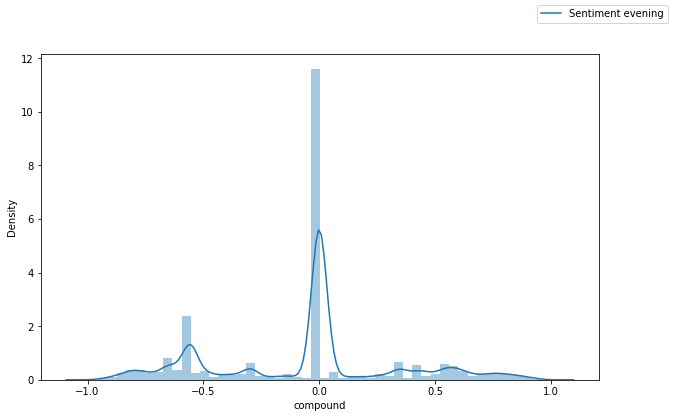

/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


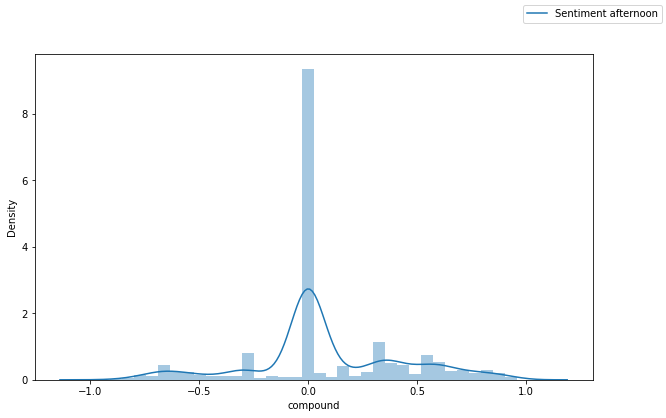

/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


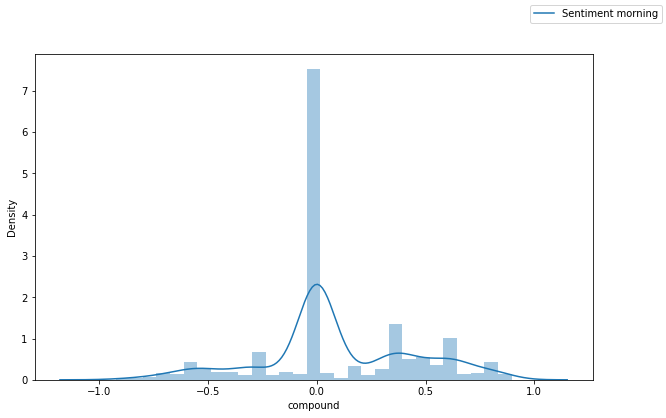

/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


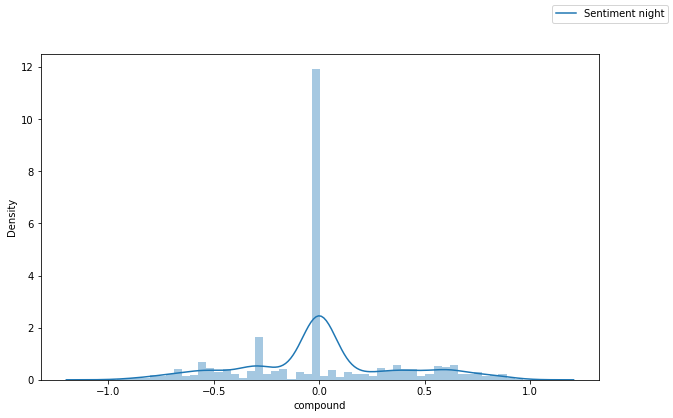

In [15]:
# plot sentiment distribution by period of the day

import seaborn as sns

fig = plt.figure(figsize=(10,6))
label = "Sentiment evening"
plot=df.loc[df['part_of_day'] == 'evening']
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment evening"])
plt.show()

fig = plt.figure(figsize=(10,6))
label = "Sentiment afternoon"
plot=df.loc[df['part_of_day'] == 'afternoon']
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment afternoon"])
plt.show()

fig = plt.figure(figsize=(10,6))
label = "Sentiment monring"
plot=df.loc[df['part_of_day'] == 'morning']
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment morning"])
plt.show()

fig = plt.figure(figsize=(10,6))
label = "Sentiment night"
plot=df.loc[df['part_of_day'] == 'night']
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment night"])
plt.show()

In [20]:
df.index = pd.to_datetime(df.index)

#averages per hour
sentiment=df['compound'].resample("h").mean()
polarity=df['polarity'].resample("h").mean()


Populating the interactive namespace from numpy and matplotlib


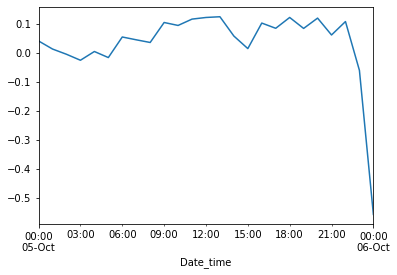

In [25]:
%matplotlib inline
%pylab inline

sentiment.plot()
plt.show()

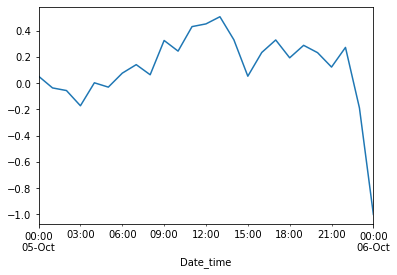

In [26]:
polarity.plot()
plt.show()